In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.svm import SVC, LinearSVC

#vectorizer = SentenceTransformer('intfloat/multilingual-e5-large-instruct', cache_folder="N:\AI\Transformers_cache")
vectorizer = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
#model = MLPClassifier(random_state=42, alpha=0.25)
model = LinearSVC(C=0.5, random_state=42)

data = pd.read_csv('Annotated_data.csv')
distortion_data = data[data['Dominant Distortion'] != 'No Distortion']
distortion_data = distortion_data.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(distortion_data['Patient Question'], distortion_data['Dominant Distortion'], test_size=0.2, random_state=42)

# Preprocess the text data and vectorize using the provided vectorizer
X_train_vectorized = vectorizer.encode(X_train.tolist())
X_test_vectorized = vectorizer.encode(X_test.tolist())

# Train the model on the training data
#model.fit(X_train_vectorized, y_train)

# Predict the labels for the testing data
#y_pred = model.predict(X_test_vectorized)

# Calculate the F1-score
#f1 = f1_score(y_test, y_pred, average='weighted')

# Output the F1-score
#print(f"F1-score: {f1}")

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# print the confusion matrix with labels
#print(confusion_matrix(y_test, y_pred, labels=distortion_data['Dominant Distortion'].unique()))

# Plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
#cm = confusion_matrix(y_test, y_pred, labels=labels)

#plt.figure(figsize=(10, 6))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
#plt.title('SBERT MLP Confusion Matrix')
#plt.xlabel('Predicted Label')
#plt.ylabel('True Label')
#plt.show()

In [17]:
# load the generated data from "distorted_parts5sample150.csv" to add to the training data
generated_data = pd.read_csv('distorted_parts2.csv')
generated_data = generated_data.dropna()
generated_data = generated_data.reset_index(drop=True)

# Change the "Mental Filers" class name to "Mental filter" to match the original data
generated_data['Dominant Distortion'] = generated_data['Dominant Distortion'].replace('Mental Filter', 'Mental filter')

# remove the generated data which contains "[INST]" and "<|im_start|>", and do some other preprocessing
generated_data = generated_data[~generated_data['Distorted part'].str.contains("\[INST\]|\|im_start\|")]

# remove "\n" characters from the generated data
generated_data['Distorted part'] = generated_data['Distorted part'].str.replace("\n", " ")

# print the generated data's unique classes
print(generated_data['Dominant Distortion'].unique())

# print the original data's unique classes
print(distortion_data['Dominant Distortion'].unique())

# print the amount of data per class
generated_data['Dominant Distortion'].value_counts()



['Magnification' 'Labeling' 'Personalization' 'Fortune-telling'
 'Emotional Reasoning' 'Mental filter']
['Personalization' 'Labeling' 'Fortune-telling' 'Magnification'
 'Mind Reading' 'All-or-nothing thinking' 'Overgeneralization'
 'Mental filter' 'Emotional Reasoning' 'Should statements']


Mental filter          116
Emotional Reasoning    105
Fortune-telling         96
Personalization         86
Labeling                74
Magnification           41
Name: Dominant Distortion, dtype: int64

In [18]:
# add the generated data to the training data
X_train_new = X_train.append(generated_data['Distorted part'], ignore_index=True)
y_train_new = y_train.append(generated_data['Dominant Distortion'], ignore_index=True)

# add the generated data to the distortion data
distortion_data_new = distortion_data.append(generated_data, ignore_index=True)

# print the amount of data per class
distortion_data_new['Dominant Distortion'].value_counts()



C:\Users\meaps\AppData\Local\Temp\ipykernel_29180\531408221.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train_new = X_train.append(generated_data['Distorted part'], ignore_index=True)
C:\Users\meaps\AppData\Local\Temp\ipykernel_29180\531408221.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train_new = y_train.append(generated_data['Dominant Distortion'], ignore_index=True)
C:\Users\meaps\AppData\Local\Temp\ipykernel_29180\531408221.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distortion_data_new = distortion_data.append(generated_data, ignore_index=True)


Personalization            239
Labeling                   239
Fortune-telling            239
Mind Reading               239
Overgeneralization         239
Emotional Reasoning        239
Mental filter              238
Magnification              236
Should statements          107
All-or-nothing thinking    100
Name: Dominant Distortion, dtype: int64

c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


F1-score: 0.2499719571835676
[[ 0  0  1  0  1  1  2  5  2  3]
 [ 0  5  5  0  4  3  6  3  3  1]
 [ 0  3  6  2  1  3  5  1  3  0]
 [ 0  1  4  5  4  4  8  8  5  1]
 [ 3  3  2  2  9  4  5  5  3  1]
 [ 0  2  1  1  0  4  0  3  1  1]
 [ 0  0  2  6  6  2 29  3  5  1]
 [ 2  4  3  4  5  5 11 15  1  0]
 [ 2  3  2  4  5  2  5  3 10  3]
 [ 0  1  2  1  3  0  2  5  3  1]]


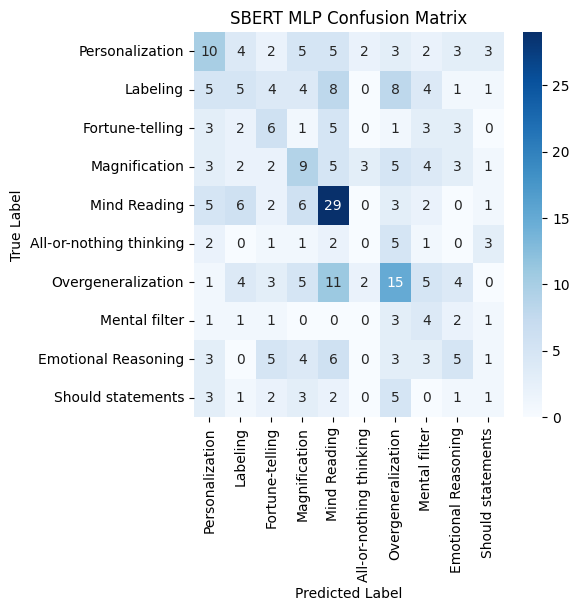

In [5]:
# vectorize the new training data
X_train_vectorized_new = vectorizer.encode(X_train_new.tolist())

# train the model on the new training data
model.fit(X_train_vectorized_new, y_train_new)

# predict the labels for the testing data
y_pred_new = model.predict(X_test_vectorized)

# calculate the F1-score
f1_new = f1_score(y_test, y_pred_new, average='weighted')

# output the F1-score
print(f"F1-score: {f1_new}")

# print the confusion matrix with the actual and predicted labels
print(confusion_matrix(y_test, y_pred_new))

# plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
cm = confusion_matrix(y_test, y_pred_new, labels=labels)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SBERT MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingGridSearchCV

def tuneParams(model, params, X_train, y_train, X_test, y_test):
    # Create a HalvingGridSearchCV and a RandomizedSearchCV object with the model and vectorizer
    search = HalvingGridSearchCV(model, params, cv=5, n_jobs=-1, verbose=1)
    #search = RandomizedSearchCV(model, params, n_iter=100, cv=5, n_jobs=-1, verbose=1)

    # Train and test the model
    search.fit(X_train, y_train)

    # Predict the labels for the testing data
    y_pred = search.predict(X_test)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Output the F1-score
    print(f"{model.__class__.__name__} F1-score: {f1}")

    # Print the best parameters
    print(search.best_params_)
    return f1

In [30]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#X_train_vectorized_new = vectorizer.encode(X_train_new.tolist())
#X_test_vectorized = vectorizer.encode(X_test.tolist())

# Vectorizors to test
vectorizers = [
    SentenceTransformer('sentence-transformers/all-mpnet-base-v2'),
    SentenceTransformer('intfloat/multilingual-e5-large-instruct', cache_folder="N:\AI\Transformers_cache")
]

vectorizer_names = [
    'sentence-transformers/all-mpnet-base-v2',
    'intfloat/multilingual-e5-large-instruct'
]

# Create an array of models to test
models = [
#    BernoulliNB(),
    LogisticRegression(),
#    SGDClassifier(),
    SVC(),
    LinearSVC(),
#    DecisionTreeClassifier(),
#    RandomForestClassifier(),
#    AdaBoostClassifier(),
#    KNeighborsClassifier(),
    MLPClassifier()
]

# Create an array of model parameters to test
params = [
#    {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
    {'C': [2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5]},
#    {'alpha': [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003]},
    {'C': [1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7]},
    {'C': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]},
#    {'max_depth': [1, 2, 3, 4, 5 ]},
#    {'n_estimators': [70, 80, 90, 100, 110, 120, 130, 140]},
#    {'n_estimators': [35, 40, 45, 50, 55, 60, 65, 70, 75]},
#    {'n_neighbors': [10, 11, 12, 13, 14, 16, 18, 20]},
    {'alpha': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}
]

# store the F1-scores
f1_scores = []

for j in range(len(vectorizers)):
    vectorizer = vectorizers[j]
    print(f"Vectorizing with {vectorizer.__class__.__name__}")
    X_train_vectorized_new = vectorizer.encode(X_train_new.tolist())
    X_test_vectorized = vectorizer.encode(X_test.tolist())
    for i in range(len(models)):
        print(f"Tuning {models[i].__class__.__name__}")
        try:
            f1 = tuneParams(models[i], params[i], X_train_vectorized_new, y_train_new, X_test_vectorized, y_test)
        except:
            f1 = 0
            print(f"Failed to tune {models[i].__class__.__name__}")
        f1_scores.append([vectorizer_names[j], models[i].__class__.__name__, f1])


Vectorizing with SentenceTransformer
Tuning LogisticRegression
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 199
max_resources_: 1795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 199
Fitting 5 folds for each of 25 candidates, totalling 125 fits
----------
iter: 1
n_candidates: 9
n_resources: 597
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 2
n_candidates: 3
n_resources: 1791
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression F1-score: 0.25869876593667834
{'C': 4.4}
Tuning SVC
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 199
max_resources_: 1795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 23
n_resources: 199
Fitting 5 folds for each of 23 candidates, totalling 115 fits
----------
iter: 1
n_candidates: 8
n_resources: 597
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 2
n_candidates: 3
n_resources: 1791
Fitting 5 folds for each of 3 candidates, totalling 15 fits
SVC F1-score: 0.254347816376027
{'C': 2.25}
Tuning LinearSVC
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 598
max_resources_: 1795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 7
n_resources: 598
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 1
n_candidates: 3
n_resources: 1794
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC F1-score: 0.2499719571835676
{'C': 0.5}
Tuning MLPClassifier
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 199
max_resources_: 1795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 11
n_resources: 199
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 1
n_candidates: 4
n_resources: 597
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 1791
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier F1-score: 0.26887441337267115
{'alpha': 0.3}
Vectorizing with SentenceTransformer


KeyboardInterrupt: 

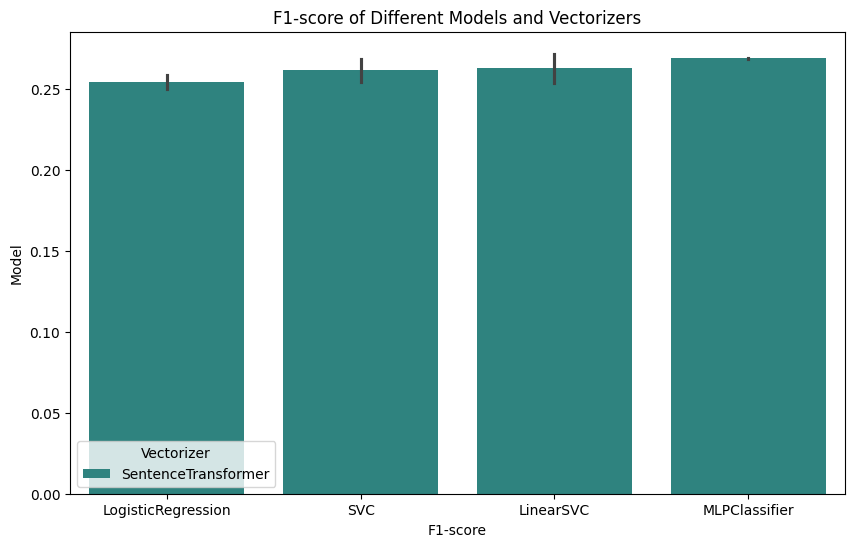

In [ ]:
# graph the F1-scores
df = pd.DataFrame(f1_scores, columns=['Vectorizer', 'Model', 'F1-score'])


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score', hue='Vectorizer', data=df)
plt.title('F1-score of Different Models and Vectorizers')
plt.xlabel('F1-score')
plt.ylabel('Model')
plt.show()


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 199
max_resources_: 1795
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 11
n_resources: 199
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 1
n_candidates: 4
n_resources: 597
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 1791
Fitting 5 folds for each of 2 candidates, totalling 10 fits


c:\Users\meaps\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier F1-score: 0.26862701513627574
                         precision    recall  f1-score   support

        Personalization       0.00      0.00      0.00        15
               Labeling       0.25      0.23      0.24        30
        Fortune-telling       0.35      0.33      0.34        24
          Magnification       0.19      0.10      0.13        40
           Mind Reading       0.21      0.22      0.21        37
All-or-nothing thinking       0.18      0.38      0.24        13
     Overgeneralization       0.40      0.56      0.47        54
          Mental filter       0.33      0.30      0.32        50
    Emotional Reasoning       0.31      0.31      0.31        39
      Should statements       0.11      0.06      0.07        18

               accuracy                           0.28       320
              macro avg       0.23      0.25      0.23       320
           weighted avg       0.27      0.28      0.27       320

[[12  3  0  4  7  2  4  3  2  2]
 [ 6  4  2

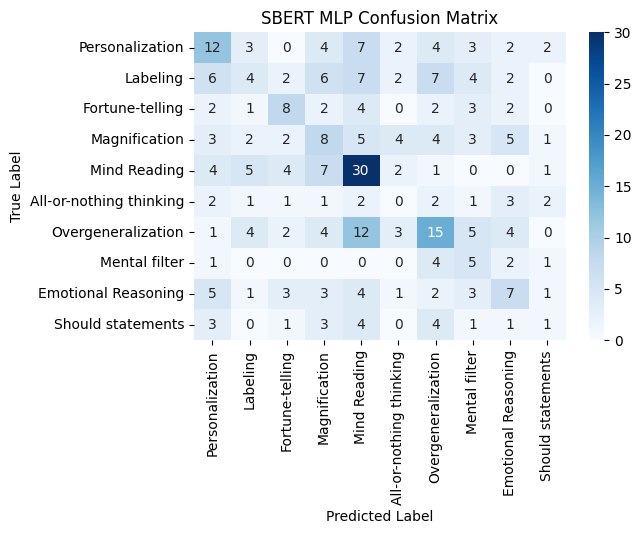

In [10]:
# run the best model with the best parameters
for i in range(len(models)):
    if f1_scores[i] == max(f1_scores):
        best_model = models[3]
        best_params = params[3]
        break

# train the best model with the best parameters manually
search = HalvingGridSearchCV(best_model, best_params, cv=5, n_jobs=-1, verbose=1)
search.fit(X_train_vectorized_new, y_train_new)
y_pred = search.predict(X_test_vectorized)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"{best_model.__class__.__name__} F1-score: {f1}")

# print the full f1 score statistics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=distortion_data['Dominant Distortion'].unique()))

# print the confusion matrix with the actual and predicted labels
print(confusion_matrix(y_test, y_pred, labels=distortion_data['Dominant Distortion'].unique()))

print(search.best_params_)

# plot the confusion matrix as a heatmap
labels = distortion_data['Dominant Distortion'].unique()
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('SBERT MLP Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()